In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
class LogisticRegression:
    def __init__(self,learning_rate=0.01,num_iterations=1000):
        self.learning_rate=learning_rate
        self.num_iterations=num_iterations
        self.theta=None
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def fit(self,X,y):
        self.theta = np.zeros(X.shape[1])
        m=X.shape[0]
        
        for i in range(self.num_iterations):
            z=np.dot(X,self.theta)
            h=self.sigmoid(z)
            
            cost = (-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
            
            grad = (1/m)*np.dot(X.T,(h-y))
            
            self.theta -= self.learning_rate*grad
            
            if i%100==0:
                print("iteration {}: Cost={}".format(i,cost))
            
    def predict(self,X):
        z=np.dot(X,self.theta)
        h=self.sigmoid(z)
        y_pred=np.round(h).astype(int)
        return y_pred



In [3]:
data = load_iris()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=42)



In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



iteration 0: Cost=0.6931471805599453
iteration 100: Cost=-0.28592081322953067
iteration 200: Cost=-0.7717750516170782
iteration 300: Cost=-1.1568547886326457
iteration 400: Cost=-1.5078154119251626
iteration 500: Cost=-1.8434697875951882
iteration 600: Cost=-2.170888203543444
iteration 700: Cost=-2.4932756898070134
iteration 800: Cost=-2.8123041543115193
iteration 900: Cost=-3.1289458088636195
[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]


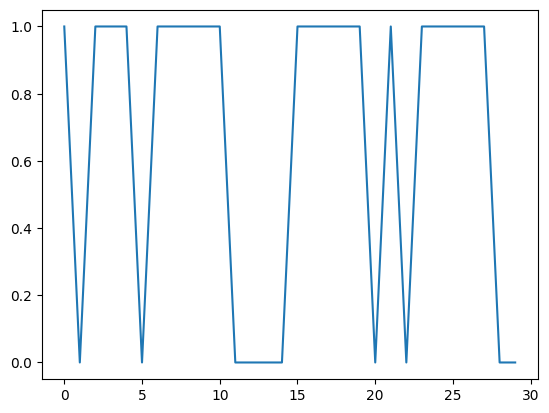

In [5]:
model = LogisticRegression(learning_rate=0.01,num_iterations=1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

y_pred

plt.plot(y_pred)

print(confusion_matrix(y_test,y_pred))
